# Homework 3

In [2]:
%matplotlib inline
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn.gaussian_process

# ML imports--tensorflow or pytorch
# Note! We will be using a Keras-provided dataset,
# so you may need to have tensorflow installed to get them
# even if you use pytorch for the ML application
import tensorflow as tf

# Problem 1 (25 points)

Building on last assignment, you should be thinking more about a concrete data set for the final project, as well as analysis methods. In 1-2 paragraphs, discuss the following questions:
* What dataset are you analyzing? Please point to a specific dataset, preferably at a public link. If you need to make the data yourself, use a self-hosting service like Google Drive or Dropbox to provide a link, or share the file with me via email or Canvas.
* What specific method are you planning to use to analyze your data? If you do not have a specific method, what kind of question (regression, correlation, classification, etc.) are you trying to answer?
* What method would you not use? Why is this method not a good choice for your dataset?
* What plots or figures are you planning on making for the final project? Note that visualization is a key part of the final project, and you should be able to convey your results using charts or plots.

## Response 
- The dataset that we will use is from kaggle: https://www.kaggle.com/datasets/mexwell/steamgames/data
- We plan to use correlation method and maybe little bit of regression to find out for which genre does the metacritic score matter the most in terms of sold units.
- We will not use classification method because we are not trying to classify anything. However, this could work for other questions, but it just not for our question
- We would create a bar graph showing the correlation coefficient against the multiple genres, which should answer our main question. That our main goals right now, but it could change as we probably add more plots or figures to analyze the dataset more and show how it work 


# Problem 2: Back propagation (25 points)
Suppose we have a relatively simple neural network: an input layer $x$ with $n$ values/neurons, a hidden layer $y$ with $m$ neurons, and 1 output neuron $z$. Assume that each of the layers are dense/fully connected layers, and the output of the hidden layer $y$ uses the sigmoid activation function $\sigma$:
$$
\sigma(x) = \frac{1}{1 + e^{-x}}.
$$
Also assume that we are using a mean-square error (MSE) loss function, which quantifies the difference between the output neuron $z_0$ and the true value $z_\mathrm{true}$ as:
$$
L(z_0, z_\mathrm{true}) = (z_0 - z_\mathrm{true})^2.
$$

## a. (10 points)
Derive an expression for the back propagation term for each type of weight or bias in the neural network:
1. a weight $W_{ij}^{(1)}$ in the dense layer connecting $y$ and $z$,
1. the bias $b_i^{(1)}$ for the dense layer connecting $y$ and $z$,
1. a weight $W_{ij}^{(0)}$ in the dense layer connecting $x$ and $y$,
1. a bias $b_i^{0}$ for the dense layer connecting $x$ and $y$.

Your expressions should involve only terms that have specific values, i.e., you should not have any symbolic derivatives in your expressions. Note that we have introduced the notation $W_{ij}^{(k)}$ and $b_i^{(k)}$ to denote weights and biases in the dense layer $k$.

1. For a weight $W_{ij}^{(1)}$ in the dense layer connecting $y$ and $z$:
$$
\frac{\partial L}{\partial W_{ij}^{(1)}} = 2(z_0 - z_{\text{true}}) \cdot y_j
$$

1. For the bias $b_i^{(1)}$ for the dense layer connecting $y$ and $z$:
$$
\frac{\partial L}{\partial b_i^{(1)}} = 2(z_0 - z_{\text{true}})
$$

1. For a weight $W_{ij}^{(0)}$ in the dense layer connecting $x$ and $y$:
$$
\frac{\partial L}{\partial W_{ij}^{(0)}} = 2(z_0 - z_{\text{true}}) \cdot W_{ij}^{(1)} \cdot y_j \cdot (1 - y_j) \cdot x_i
$$

1. For a bias $b_i^{0}$ for the dense layer connecting $x$ and $y$:
$$
\frac{\partial L}{\partial b_i^{0}} = 2(z_0 - z_{\text{true}}) \cdot W_{ij}^{(1)} \cdot y_j \cdot (1 - y_j)
$$


## b. (5 points)
Write an expression for the overall gradient of the loss function $\nabla L$. Again, you should only include specific values, but you may use summation notation to express the sum over the $n$ neurons in the input layer $x$ and the $m$ neurons in the hidden layer $y$.

1. For the weights $W_{ij}^{(1)}$ in the dense layer connecting $y$ and $z$:
$$
\frac{\partial L}{\partial W_{ij}^{(1)}} = 2(z_0 - z_{\text{true}}) \cdot y_j
$$
Summing over all $m$ neurons in the hidden layer $y$, we get:
$$
\sum_{j=1}^{m} \frac{\partial L}{\partial W_{ij}^{(1)}} = 2(z_0 - z_{\text{true}}) \cdot \sum_{j=1}^{m} y_j
$$

2. For the biases $b_i^{(1)}$ for the dense layer connecting $y$ and $z$:
$$
\frac{\partial L}{\partial b_i^{(1)}} = 2(z_0 - z_{\text{true}})
$$
This is the same for all $m$ neurons in the hidden layer $y$, so the sum is:
$$
\sum_{i=1}^{m} \frac{\partial L}{\partial b_i^{(1)}} = 2m(z_0 - z_{\text{true}})
$$

3. For the weights $W_{ij}^{(0)}$ in the dense layer connecting $x$ and $y$:
$$
\frac{\partial L}{\partial W_{ij}^{(0)}} = 2(z_0 - z_{\text{true}}) \cdot W_{ij}^{(1)} \cdot y_j \cdot (1 - y_j) \cdot x_i
$$
Summing over all $n$ neurons in the input layer $x$ and all $m$ neurons in the hidden layer $y$, we get:
$$
\sum_{i=1}^{n} \sum_{j=1}^{m} \frac{\partial L}{\partial W_{ij}^{(0)}} = 2(z_0 - z_{\text{true}}) \cdot \sum_{i=1}^{n} \sum_{j=1}^{m} W_{ij}^{(1)} \cdot y_j \cdot (1 - y_j) \cdot x_i
$$

4. For the biases $b_i^{0}$ for the dense layer connecting $x$ and $y$:
$$
\frac{\partial L}{\partial b_i^{0}} = 2(z_0 - z_{\text{true}}) \cdot W_{ij}^{(1)} \cdot y_j \cdot (1 - y_j)
$$
Summing over all $m$ neurons in the hidden layer $y$, we get:
$$
\sum_{i=1}^{m} \frac{\partial L}{\partial b_i^{0}} = 2(z_0 - z_{\text{true}}) \cdot \sum_{i=1}^{m} W_{ij}^{(1)} \cdot y_j \cdot (1 - y_j)
$$

## c. (10 points)
Show that if all weights and biases are initialized with values of 0, some of the terms in your expression are equal. Which terms are equal? (_N.B._: this is why neural networks are initialized with random numbers!)

If all weights and biases are initialized with values of 0, then the following terms are equal:

1. $W_{ij}^{(1)} = W_{kl}^{(1)}$ for all $i,j,k,l$. This means all weights in the layer connecting $y$ and $z$ are equal.

2. $b_i^{(1)} = b_k^{(1)}$ for all $i,k$. This means all biases in the layer connecting $y$ and $z$ are equal.

3. $W_{ij}^{(0)} = W_{kl}^{(0)}$ for all $i,j,k,l$. This means all weights in the layer connecting $x$ and $y$ are equal.

4. $b_i^{0} = b_k^{0}$ for all $i,k$. This means all biases in the layer connecting $x$ and $y$ are equal.

-> all neurons in the hidden layer $y$ will have the same output, i.e., $y_j = y_k$ for all $j,k$ & lead to the same partial derivatives of the loss function with respect to all weights and biases

# Problem 3: Training neural networks (40 points)
For this problem we will be using the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). The data consist of 50,000 training images that are 32x32 pixels, with 3 color channels, and belong to 1 of 10 categories. There are also 10,000 test images.

## a. (5 points)
Read the data in and combine them into a single dataset/series of labels that are length 60,000. The data are available in `tensorflow.keras.datasets`, or from the website linked above. (_Hint_: if you use the data from TensorFlow, you will be default get already-separated train and test data. You will need to combine them together using NumPy functions. The final shape of your x (input) data should be `(60000, 32, 32, 3)`, and the final shape of your y (label) data should be `(60000, 1)`).

In [3]:
(train_images, train_labels), (test_images, test_labels)= tf.keras.datasets.cifar10.load_data()
# need to combining togetehr using numpy as we use data from tensorflow
x_data = np.concatenate([train_images, test_images])
y_data = np.concatenate([train_labels, test_labels])

assert x_data.shape == (60000, 32, 32, 3)
assert y_data.shape == (60000, 1)

170498071/170498071 [==============================] - 11s 0us/step


## b. (5 points)
Pre-process the data and labels. The data have values between 0-255. Normalize them to have values between 0 and 1. Also, because this is a classification problem, you will need to build one-hot encodings for the labels (like we did for the MNIST dataset).

In [4]:
x_data_renorm = x_data / 255.0 # renormalize to [0,1] range
y_data_encoded = tf.keras.utils.to_categorical(y_data, 10) # one-hot encoding using keras utilities

## c. (5 points)
Make a plot of the first 25 images in the test dataset, along with the (human-meaningful) label of what class they belong to.

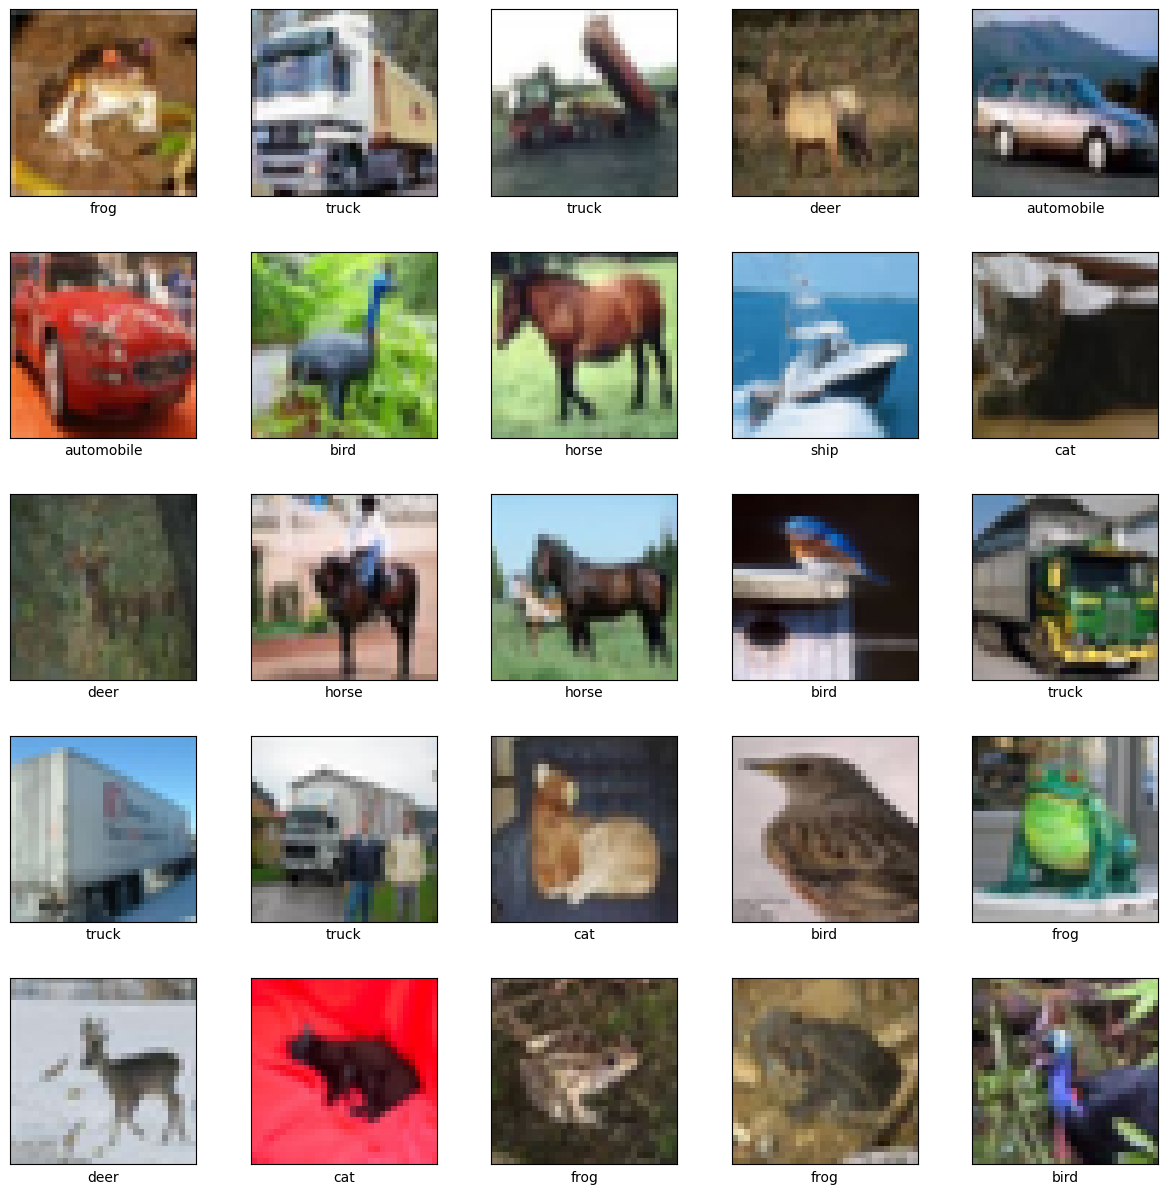

In [5]:
# Define the class names based on link of dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1) # 5 rows, 5 columns, i+1th plot
    plt.xticks([]) # remove xticks 
    plt.yticks([]) # remove yticks
    plt.grid(False) # remove grid
    plt.imshow(x_data_renorm[i]) # show image
    plt.xlabel(class_names[np.argmax(y_data_encoded[i])]) # show label as xlabel (argmax to get the index of the 1 in the one-hot encoding)
    
plt.subplots_adjust(hspace=0.3)
plt.show()

# also, the images quite blurry, idk if this is intentional or not 
# but i will keep it like this bc i don't want to mess with images data 

## d. (10 points)
Design an implement a neural network for classifying the input data. Begin by using a series of dense (fully connected) layers, with a ReLU activation function. Compile the network with a metric of `"accuracy"`, and a loss function that is appropriate for classification problems.

In [6]:
model = tf.keras.models.Sequential() # create a sequential model
# addd 3 layers of relu and 1 layer of softmax
# but first, we need to flatten the data
model.add(tf.keras.layers.Flatten(input_shape=(32, 32, 3))) # flatten the data
model.add(tf.keras.layers.Dense(512, activation='relu')) # add a layer of 512 neurons with relu activation
model.add(tf.keras.layers.Dense(128, activation='relu')) # add a layer of 128 neurons with relu activation
model.add(tf.keras.layers.Dense(64, activation='relu')) # add a layer of 64 neurons with relu activation
model.add(tf.keras.layers.Dense(10, activation='softmax')) # add a layer of 10 neurons with softmax activation

# we will using categorical_crossentropy as our loss function as it is a multi-class classification problem
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## e. (5 points)
Perform $k$-fold cross-validation using 5 different train/validate/test splits. In each case, use 70% of the data for training, 10% for validation, and 20% for testing. Save the `history` from each of the validations in a dictionary. (_Note_: you do not need to train for more than 50 epochs for each fold. This is a complicated dataset, and getting high accuracy is non-trivial!)

In [7]:
from sklearn.model_selection import train_test_split

results_dict = {} # dictionary to store results

for i in range(5): # 5-fold cross validation
    # Divide data into train and test splits
    x_train, x_test, y_train, y_test = train_test_split(x_data_renorm, y_data_encoded, test_size=0.2, random_state=i)
    # use 0.2 or 20% of data as test data
    # train_test_split will shuffle the data before splitting it into train and test splits (random_state=i will ensure that the same random shuffling is done for each fold)
    
    # Further divide training data into train and validation splits
    x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125, random_state=i) # 0.125 x 0.8 = 0.1
    # do 0.125 here bc 0.125 x 0.8 = 0.1

    # Train the network
    history = model.fit(x_train, y_train, epochs=25, validation_data=(x_validate, y_validate))
    
    # Add to dictionary
    results_dict[f"fold_{i}"] = history.history

# beware of training this as it take me like 1 hour to train this on my laptop
# prob could be faster on other computer 

Epoch 1/25
1313/1313 [==============================] - 29s 21ms/step - loss: 1.8939 - accuracy: 0.3128 - val_loss: 1.7265 - val_accuracy: 0.3812
Epoch 2/25
1313/1313 [==============================] - 29s 22ms/step - loss: 1.7115 - accuracy: 0.3850 - val_loss: 1.6429 - val_accuracy: 0.4120
Epoch 3/25
1313/1313 [==============================] - 34s 26ms/step - loss: 1.6316 - accuracy: 0.4167 - val_loss: 1.6356 - val_accuracy: 0.4087
Epoch 4/25
1313/1313 [==============================] - 37s 28ms/step - loss: 1.5720 - accuracy: 0.4378 - val_loss: 1.6148 - val_accuracy: 0.4172
Epoch 5/25
1313/1313 [==============================] - 37s 28ms/step - loss: 1.5354 - accuracy: 0.4555 - val_loss: 1.5836 - val_accuracy: 0.4253
Epoch 6/25
1313/1313 [==============================] - 37s 28ms/step - loss: 1.5015 - accuracy: 0.4646 - val_loss: 1.5454 - val_accuracy: 0.4435
Epoch 7/25
1313/1313 [==============================] - 37s 28ms/step - loss: 1.4665 - accuracy: 0.4768 - val_loss: 1.5813 -

## f. (5 points)
Plot the accuracy and loss values for each of your folds as a function of epoch. Based on these plots, does it seem that your network is overfitting the data?

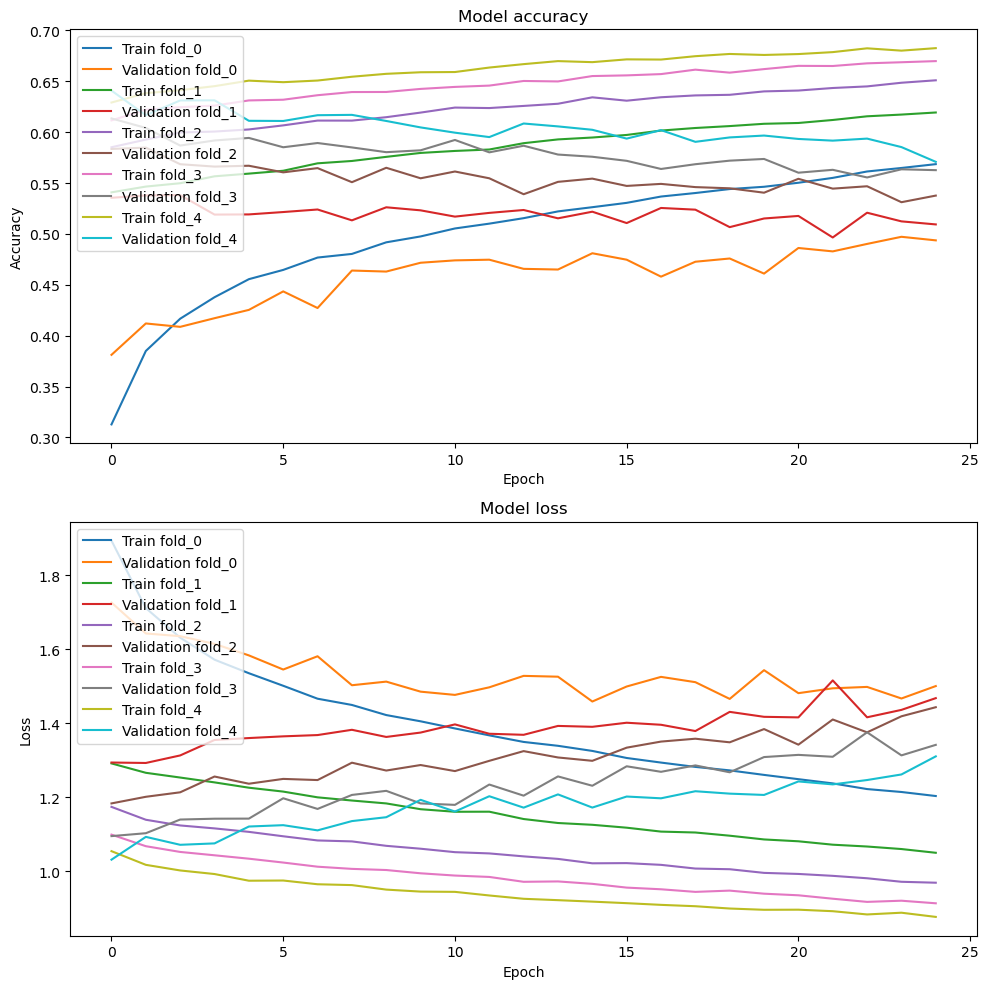

In [8]:
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot accuracy
for i in range(5):
    axs[0].plot(results_dict[f"fold_{i}"]['accuracy'], label=f"Train fold_{i}") # plot accuracy for each fold
    axs[0].plot(results_dict[f"fold_{i}"]['val_accuracy'], label=f"Validation fold_{i}") # plot validation accuracy for each fold
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(loc='upper left')

# Plot loss
for i in range(5):
    axs[1].plot(results_dict[f"fold_{i}"]['loss'], label=f"Train fold_{i}") # plot loss for each fold
    axs[1].plot(results_dict[f"fold_{i}"]['val_loss'], label=f"Validation fold_{i}") # plot validation loss for each fold
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model on the test data to see if it is overfitting or not 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {test_loss}")
print(f"Test accuracy: {test_acc}")

# yes, i think that mine is overfitting as the validation accuracy is lower than the training accuracy
# and the validation loss is higher than the training loss (the validation loss is also increasing while the training loss is decreasing)

## g. (5 points)
Repeat parts (c), (d), and (e), but using a convolutional neural network (i.e., include convolutional layers like `Conv2D`). Try to achieve a validation accuracy >= 75%. (_Hint_: You should find that the accuracy of your results improves when adding convolutional layers. If not, then you may have to play around with the architecture, or add regularization layers. Don't give up! The CIFAR-10 dataset is more complicated than MNIST, so the networks will have to be more complicated than what we covered in class, but good results are possible!)

In [9]:
model = tf.keras.models.Sequential([
    # add layers with convolutional and max pooling layers before the dense layers
    # so that the model can learn more complex features from the images
    # which will hopefully improve the accuracy
    # the convolutional layers will also reduce the number of parameters in the model
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # 32 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D((2, 2)), # 2x2 max pooling layer of stride 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters, 3x3 kernel size
    tf.keras.layers.MaxPooling2D((2, 2)), # 2x2 max pooling layer of stride 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'), # 64 filters, 3x3 kernel size
    # we do 32 then 64 and 64 conv2d layers bc we want to increase the number of filters as we go deeper into the network
    # then we do max pooling to reduce the size of the output of the conv2d layers 
    tf.keras.layers.Flatten(), # flatten the data
    tf.keras.layers.Dense(64, activation='relu'), # add a layer of 64 neurons with relu activation
    tf.keras.layers.Dense(10, activation='softmax') # add a layer of 10 neurons with softmax activation
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
from sklearn.model_selection import train_test_split

results_dict = {}

for i in range(5):
    # Divide data into train and test splits
    x_train, x_test, y_train, y_test = train_test_split(x_data_renorm, y_data_encoded, test_size=0.2, random_state=i)
    
    # Further divide training data into train and validation splits
    x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.125, random_state=i) # 0.125 x 0.8 = 0.1
    
    # Train the network
    history = model.fit(x_train, y_train, epochs=25, validation_data=(x_validate, y_validate))
    
    # Add to dictionary
    results_dict[f"fold_{i}"] = history.history

Epoch 1/25
1313/1313 [==============================] - 36s 26ms/step - loss: 1.5612 - accuracy: 0.4273 - val_loss: 1.3119 - val_accuracy: 0.5292
Epoch 2/25
1313/1313 [==============================] - 34s 26ms/step - loss: 1.2013 - accuracy: 0.5707 - val_loss: 1.1813 - val_accuracy: 0.5813
Epoch 3/25
1313/1313 [==============================] - 34s 26ms/step - loss: 1.0559 - accuracy: 0.6259 - val_loss: 1.0382 - val_accuracy: 0.6373
Epoch 4/25
1313/1313 [==============================] - 31s 24ms/step - loss: 0.9533 - accuracy: 0.6615 - val_loss: 0.9821 - val_accuracy: 0.6522
Epoch 5/25
1313/1313 [==============================] - 37s 28ms/step - loss: 0.8749 - accuracy: 0.6927 - val_loss: 0.9489 - val_accuracy: 0.6738
Epoch 6/25
1313/1313 [==============================] - 36s 27ms/step - loss: 0.8059 - accuracy: 0.7158 - val_loss: 0.9341 - val_accuracy: 0.6797
Epoch 7/25
1313/1313 [==============================] - 35s 26ms/step - loss: 0.7571 - accuracy: 0.7355 - val_loss: 0.8927 -

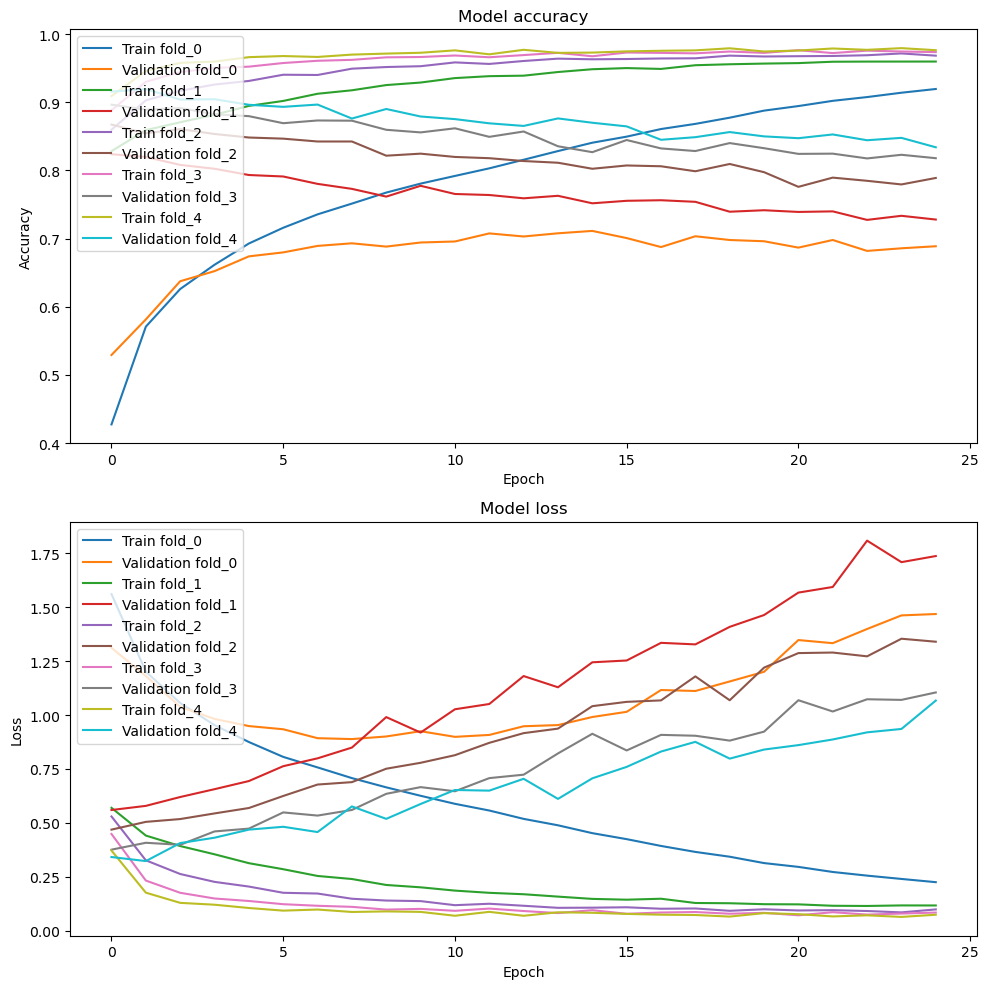

In [11]:
fig, axs = plt.subplots(2, figsize=(10, 10))

# Plot accuracy
for i in range(5):
    axs[0].plot(results_dict[f"fold_{i}"]['accuracy'], label=f"Train fold_{i}")
    axs[0].plot(results_dict[f"fold_{i}"]['val_accuracy'], label=f"Validation fold_{i}")
axs[0].set_title('Model accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].set_xlabel('Epoch')
axs[0].legend(loc='upper left')

# Plot loss
for i in range(5):
    axs[1].plot(results_dict[f"fold_{i}"]['loss'], label=f"Train fold_{i}")
    axs[1].plot(results_dict[f"fold_{i}"]['val_loss'], label=f"Validation fold_{i}")
axs[1].set_title('Model loss')
axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epoch')
axs[1].legend(loc='upper left')

plt.tight_layout()
plt.show()

# hmm i think it still overfits as the validation accuracy is lower than the training accuracy
# and the validation loss is higher than the training loss (the validation loss is also increasing while the training loss is decreasing)

In [12]:
# print out accuracy and loss as well as val accuracy and val loss
print("Accuracy: ", results_dict['fold_0']['accuracy'][-1])
print("Loss: ", results_dict['fold_0']['loss'][-1])
print("Validation Accuracy: ", results_dict['fold_0']['val_accuracy'][-1])
print("Validation Loss: ", results_dict['fold_0']['val_loss'][-1])

Accuracy:  0.9193333387374878
Loss:  0.2247602492570877
Validation Accuracy:  0.6886666417121887
Validation Loss:  1.4686604738235474


# Problem 4: Gaussian Process Regression (10 points)
Let us revisit some of the data from HW2, and fit it using a different method. This time, we will use the Gaussian Process Regression (GPR) technique.

## a. (5 points)
Read in the data `problem2.txt`. Note that as before, the columns are: $x$-values, $y$-values, and associated uncertainties $\sigma_y$. Perform a fit using `sklearn.gaussian_process.GaussianProcessRegressor`, which incorporates the uncertainties.

In [15]:
# read from txt file 
mydata = np.loadtxt("problem2.txt")
xvals = mydata[:, 0] # first column
yvals = mydata[:, 1] # second column 
yerr = mydata[:, 2] # third column

# Define the kernel function
from sklearn.gaussian_process.kernels import RBF # Radial Basis Function kernel
# ref: https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html
# https://scikit-learn.org/stable/modules/gaussian_process.html
kernel = 1.0 * RBF(length_scale=1.0)

# Create a GaussianProcessRegressor object
from sklearn.gaussian_process import GaussianProcessRegressor
gp = GaussianProcessRegressor(kernel=kernel, alpha=(yerr/yvals)**2, normalize_y=True)

# Fit the GPR model to the data
gp.fit(xvals[:, None], yvals)

GaussianProcessRegressor(alpha=array([5.92976161e-02, 5.32373206e+00, 1.24756829e-01, 4.07233648e+00,
       9.43629721e-01, 3.36631050e+01, 2.29413743e+00, 4.86544872e-01,
       1.03149406e+00, 8.20212953e-01, 2.24591648e+00, 6.37453799e+00,
       3.79310915e-01, 4.35042014e-01, 6.35271231e-01, 4.50634463e-01,
       9.86189856e-02, 3.50174057e-01, 6.11025057e+01, 8.71696871e-02,
       6.49845487e-01, 1.02401213e+00, 4.49136022e+00, 7.69801586e-01,
       2.24438400e+00, 2.86419579e+00, 1.72805341e-01, 9.01396607e-01,
       2.40859142e-01, 1.42828336e-01]),
                         kernel=1**2 * RBF(length_scale=1), normalize_y=True)

## b. (5 points)
Plot the result of the fit $\pm 2\sigma$ uncertainty over the interval $-3 \leq x \leq 3$, along with the input data and uncertainty. How does it compare with the cubic model made via linear least squares fitting you did last time?

Also compute the score for the fit. Does the fit look reasonable to you?

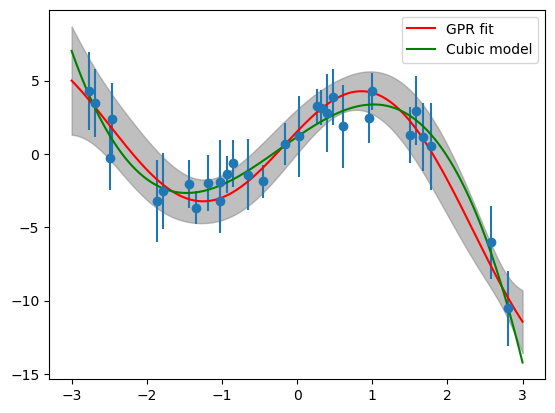

In [21]:
# Predict y-values and standard deviation over the interval -3 <= x <= 3
xfit = np.linspace(-3, 3, num=1000).reshape(-1, 1) # reshape to 2D array
yfit, yfit_std = gp.predict(xfit, return_std=True) # predict y-values and standard deviation

fig = plt.figure()
ax = plt.gca()

# Plot input data with uncertainty
ax.errorbar(xvals, yvals, yerr=yerr, fmt='o')

# Plot GPR fit
ax.plot(xfit, yfit, 'r-', label='GPR fit')

# Plot GPR uncertainty
# we do yfit +/- 2*yfit_std to get the 95% confidence interval
# alpha = 0.5 bc we want the fill to be transparent
ax.fill_between(xfit.ravel(), yfit - 2*yfit_std, yfit + 2*yfit_std, alpha=0.5, color='grey')

# Compute the cubic model from last time
# transposed matrix and then np.array bc we want to do matrix multiplication
Amat = np.transpose(np.array([np.ones_like(xvals), xvals, xvals**2, xvals**3]))
b = yvals
result = scipy.optimize.lsq_linear(Amat, b)
cubic_model = result.x[0] + result.x[1]*xfit + result.x[2]*xfit**2 + result.x[3]*xfit**3

# Plot cubic model
ax.plot(xfit, cubic_model, 'g-', label='Cubic model')

ax.legend()

# between GRP and cubic, the GPR model is better as it is more flexible and can fit the data better 
# as we can see that the GRP line is closer to the data points than the cubic model line

In [17]:
# Compute the score
score = gp.score(xvals[:, None], yvals)
print("Score: ", score)

# yes, i think the score quite good as it is close to 1 (the maximum score)
# and if we round up, it wil be like 0.90 so quite good 

Score:  0.8981295542350975
